In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Data Preparation
# Load dataset (assuming the Excel file is named 'data.xlsx')
df = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')




age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


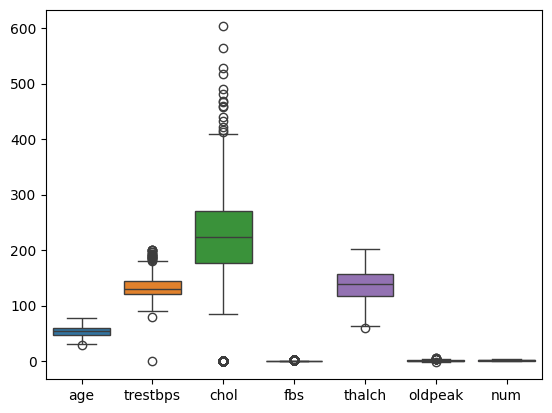

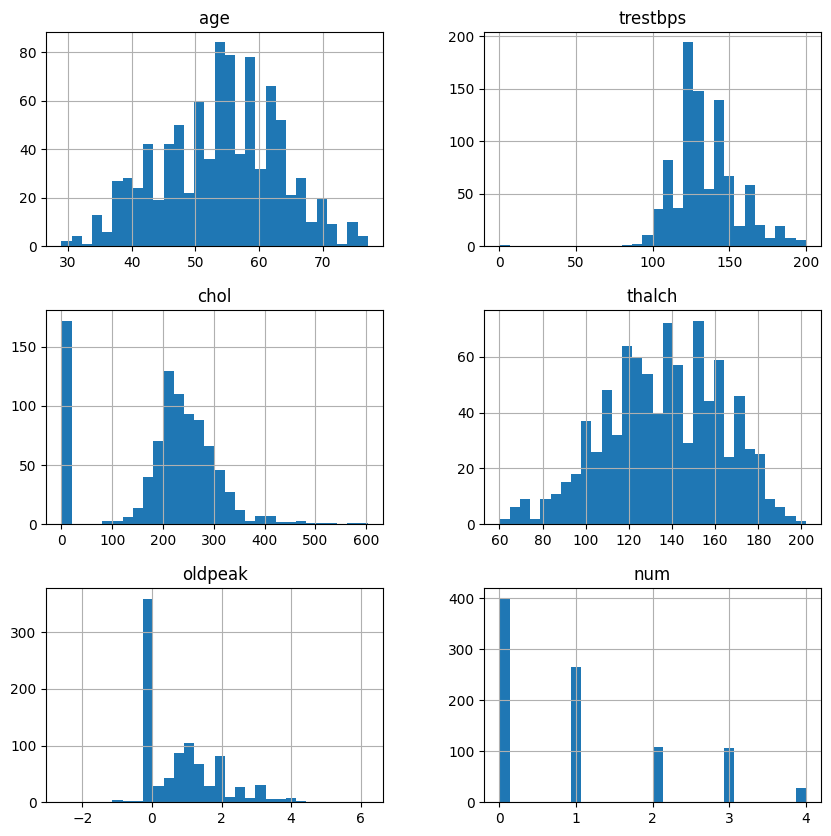

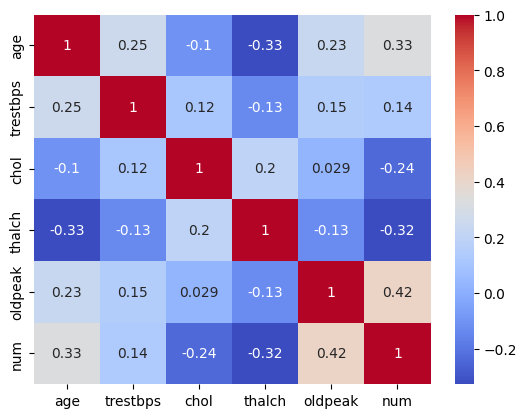

In [33]:

# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print(df.isnull().sum())

# Handle missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


sns.boxplot(data=df)

# Visualize feature distributions
df.hist(bins=30, figsize=(10, 10))
plt.show()

# Check correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [34]:
# Step 3: Feature Engineering
# If categorical variables exist, apply Label Encoding or One-hot Encoding
# Example of Label Encoding
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

# Example of One-hot Encoding (if needed for multiple categories)
df = pd.get_dummies(df, drop_first=True)

In [35]:
# Step 4: Decision Tree Classification
# Split the data into features and target
X = df.drop('num', axis=1)  # assuming 'Target' is the column we want to predict
y = df['num']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [36]:
# Step 5: Hyperparameter Tuning (Example with max_depth and min_samples_split)
dt_model_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [37]:
# Step 6: Model Evaluation and Analysis
# Predictions on the test set
y_pred = dt_model_tuned.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [38]:
# Evaluate performance with appropriate average for multiclass
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [39]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Compute ROC-AUC only if the classifier supports probability predictions
if hasattr(dt_model_tuned, "predict_proba"):  # Ensure model supports predict_proba
    roc_auc = roc_auc_score(y_test, dt_model_tuned.predict_proba(X_test), multi_class='ovr', average='weighted')
    print(f'ROC-AUC: {roc_auc:.2f}')
else:
    print("ROC-AUC cannot be computed as the model does not support probability estimation.")



Accuracy: 0.55
Precision: 0.46
Recall: 0.55
F1-Score: 0.50
ROC-AUC: 0.74


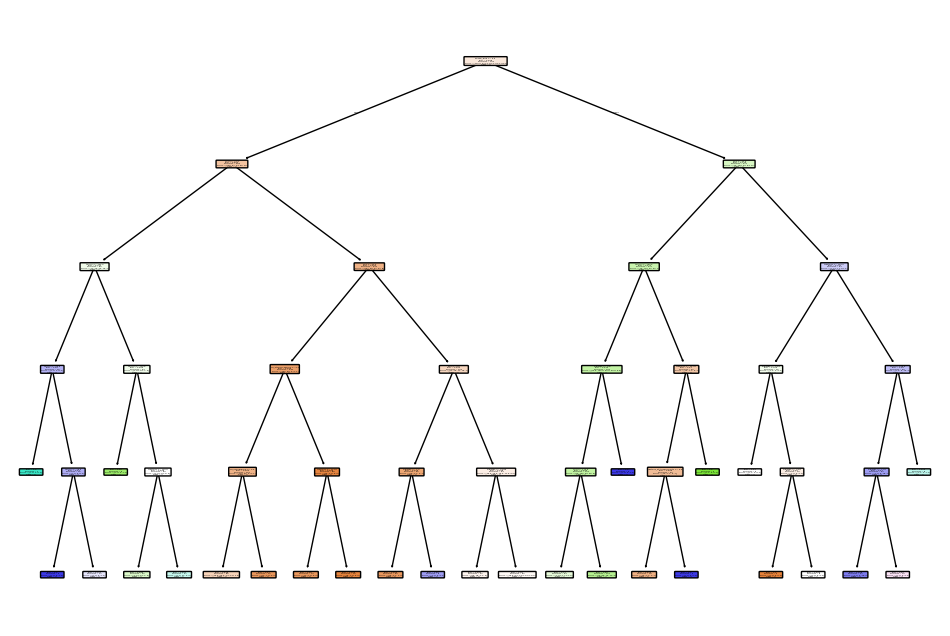

In [40]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model_tuned, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], rounded=True)
plt.show()